In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

## Problem 1

The integral solved by RK4 has a value of 19.940049188005577


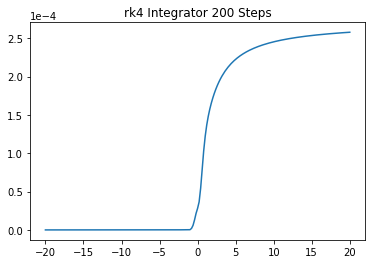

In [2]:
def func(x, y):
    return y/(1+x**2)

def rk4_step(fun, x, y, h):
    k1=h*fun(x,y)
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    dy=(k1+2*k2+2*k3+k4)/6
    return y+dy

x = np.linspace(-20, 20, 201)
y = np.zeros((2, len(x)))
y[0,0] = 1

for i in range(len(x)-1):
    h = x[i+1]-x[i]
    y[:,i+1] = rk4_step(func, x[i], y[:,i], h)

print('The integral solved by RK4 has a value of',y[0,-1]-y[0,0])
c = 1/(np.exp(np.arctan(-20)))
plt.plot(x, abs(y[0,:]-c*np.exp(np.arctan(x))))
plt.title('rk4 Integrator 200 Steps')
plt.ticklabel_format(axis='y', style = 'sci', scilimits=(0,0))

For our rk4 integrator, we get errors on the order of -4 when run with 200 steps on our function.

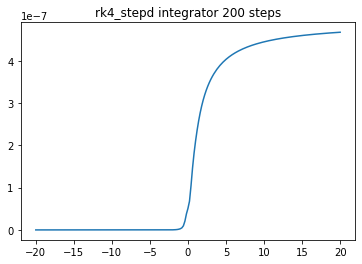

In [3]:
def rk4_stepd(fun, x, y, h):
    step = rk4_step(fun, x, y, h)
    half1 = rk4_step(fun, x, y, h/2)
    half2 = rk4_step(fun, x+h/2, half1, h/2)
    return half2 + (half2-step)/15

y2 = np.zeros((2,len(x)))
y2[0,0] = 1

for i in range(len(x)-1):
    h = x[i+1]-x[i]
    y2[:,i+1] = rk4_stepd(func, x[i], y2[:,i], h)
    
plt.plot(x, abs(y2[0,:]-c*np.exp(np.arctan(x))))
plt.title('rk4_stepd integrator 200 steps')
plt.ticklabel_format(axis='y', style = 'sci', scilimits=(0,0))

For our rk4_stepd integrator with the same number of steps, we get errors on the order of -5, one order of magnitude less than rk4, which we expect from the $\frac{2^5}{2} = 16$ factor in error terms.

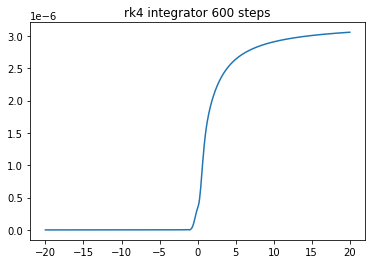

In [4]:
xx = np.linspace(-20, 20, 601)
yy = np.zeros((2, len(xx)))
yy[0,0] = 1

for i in range(len(xx)-1):
    h = xx[i+1]-xx[i]
    yy[:,i+1] = rk4_step(func, xx[i], yy[:,i], h)

plt.plot(xx, abs(yy[0,:]-c*np.exp(np.arctan(xx))))
plt.title('rk4 integrator 600 steps')
plt.ticklabel_format(axis='y', style = 'sci', scilimits=(0,0))

We notice that rk4_stepd has 3 times the amount of function evaluations compared to rk4 (rk4_stepd has 12, rk4 has 4). So running rk4 with 600 steps results in the same number of function evaluations as rk4_stepd with the original 200 steps. 

With the same function evaluations, rk4_stepd still results in better error by one order of magnitude.

## Problem 2 a.)


In [5]:
half_life = [4.468e9, 24.10/365, 6.7/24/365, 245500, 75380, 1600, 3.8235/365, \
            3.10/60/24/365, 26.8/60/24/365, 19.9/60/24/365, 164.3e-6/60/60/24/365, \
            22.3, 5.015, 138.376/365]

def fun(x, y, half_life=half_life):
    dydx = np.zeros(len(half_life)+1)
    dydx[0] = -y[0]/half_life[0] * np.log(2)
    for i in range(1,14):
        dydx[i] = np.log(2)*(y[i-1]/half_life[i-1] - y[i]/half_life[i])
    dydx[-1] = y[-2]/half_life[-2] * np.log(2)
    return dydx

y0 = np.zeros(15)
y0[0] = 1
x0 = 0
x1 = 5e9 

#ans_rk4 = integrate.solve_ivp(fun, [x0, x1], y0, method = 'RK45')
ans_stiff = integrate.solve_ivp(fun, [x0,x1], y0, method = 'Radau')

We use Radau Method because RK4 is extremely slow and has to compute significantly more function evaluations.

## b.)

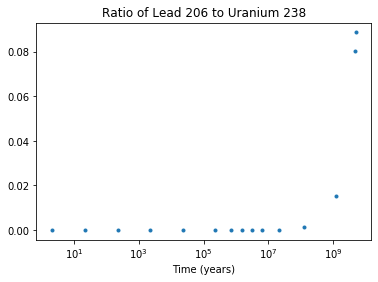

In [6]:
plt.plot(ans_stiff.t, ans_stiff.y[-1]/ans_stiff.y[0], '.')
plt.title('Ratio of Lead 206 to Uranium 238')
plt.xscale('log')
plt.xlabel('Time (years)')
plt.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


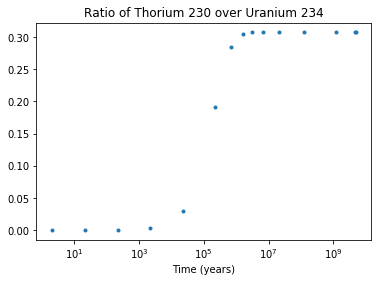

In [7]:
plt.plot(ans_stiff.t, ans_stiff.y[4]/ans_stiff.y[3], '.')
plt.xscale('log')
plt.title('Ratio of Thorium 230 over Uranium 234')
plt.xlabel('Time (years)')
plt.show()

## Problem 3 a.)

$z - z_0 = a((x-x_0)^2 + (y-y_0)^2)$
<br>
$z = a(x^2 - 2xx_0 + x_0^2 + y^2 -2yy_0+y_0^2)+z_0$
<br>
$Z = A(x^2 + y^2) + Bx + Cy + D$
<br>
where $A=a, B=-2ax_0, C=-2ay_0, D=z_0+ax_0^2+ay_0^2$

## b.)

In [8]:
x,y,z = np.loadtxt('dish_zenith.txt').T
Am = np.ones((len(x), 4))

for i in range(len(x)):
    Am[i,0] = x[i]**2 + y[i]**2
    Am[i,1] = x[i]
    Am[i,2] = y[i]

m = np.linalg.inv(Am.T@Am)@Am.T@z
print('Best fit parameters are', m)

Best fit parameters are [ 1.66704455e-04  4.53599028e-04 -1.94115589e-02 -1.51231182e+03]


## c.)

Focal Length of 1.499659984125216 with uncertainty 7.93429460581163e-05


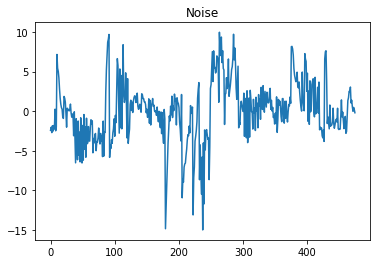

In [9]:
plt.plot(z-Am@m)
plt.title('Noise')
noise = np.std(z-Am@m)
cov = np.linalg.inv(Am.T@Am)/noise
a = np.sqrt(abs(np.diag(cov)[0]))
f = 1/(4*m[0]) # in mm
f_uncert = 1/(4*m[0]**2)*np.sqrt(abs(np.diag(cov)[0])) # in mm
print('Focal Length of', f/1000, 'with uncertainty', f_uncert/1000)